In [14]:
import torch
device = torch.device('mps:0' if torch.backends.mps.is_available() else 'cpu')

print(torch.tensor([[1, 2], [3, 4]]))
print(torch.tensor([[1, 2], [3, 4]], dtype=torch.float64))


temp = torch.tensor([[1, 2], [3, 4]])
print(temp.numpy())

tensor([[1, 2],
        [3, 4]])
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)
[[1 2]
 [3 4]]
tensor(1.) tensor(2.) tensor(7.)


In [17]:
temp = torch.FloatTensor([1, 2, 3, 4, 5, 6, 7])
print(temp[0], temp[1], temp[-1])
print('----------------------------------------')
print(temp[2:5], temp[4:-1])


tensor(1.) tensor(2.) tensor(7.)
----------------------------------------
tensor([3., 4., 5.]) tensor([5., 6.])


In [19]:
v = torch.tensor([1, 2, 3])
w = torch.tensor([3, 4, 6])
print(w-v)


tensor([2, 2, 3])


In [21]:
temp = torch.tensor([[1, 2], [3, 4]])
print(f"temp.shape: {temp.shape}")
print(f"temp.view {temp.view(4, 1)}") # 4 x 1 행렬로 변환
print(f"temp.view {temp.view(-1)}") # 1차원 벡터로 변환
print(f"temp.view {temp.view(1, -1)}") # 1 x 4 행렬로 변환
print(f"temp.view {temp.view(-1, 1)}") # 4 x 1 행렬로 변환




temp.shape: torch.Size([2, 2])
temp.view tensor([[1],
        [2],
        [3],
        [4]])
temp.view tensor([1, 2, 3, 4])
temp.view tensor([[1, 2, 3, 4]])
temp.view tensor([[1],
        [2],
        [3],
        [4]])


## 2.2.4


In [1]:
import torch
device = torch.device('mps:0' if torch.backends.mps.is_available() else 'cpu')
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [5]:
dataset = pd.read_csv('./car_evaluation.csv')
dataset.head()
dataset.tail()

,price,maint,doors,persons,lug_capacity,safety,output
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


<AxesSubplot:ylabel='output'>

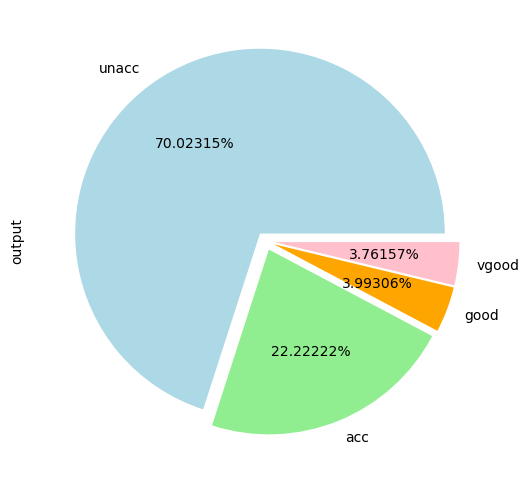

In [10]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct="%0.05f%%", colors=['lightblue', 'lightgreen', 'orange', 'pink'], 
                                   explode=(0.05, 0.05, 0.05, 0.05))

In [13]:
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

for category in categorical_columns:
    dataset[category] = dataset[category].astype('category')

price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
person = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, person, lug_capacity, safety])
categorical_data[:10]


array([[3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 2, 2, 2],
       [2, 2, 2, ..., 0, 0, 0],
       [1, 2, 0, ..., 1, 2, 0]], dtype=int8)

In [14]:
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]


tensor([[3, 3, 3,  ..., 1, 1, 1],
        [3, 3, 3,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 3, 3, 3],
        [0, 0, 0,  ..., 2, 2, 2],
        [2, 2, 2,  ..., 0, 0, 0],
        [1, 2, 0,  ..., 1, 2, 0]])

In [16]:
output = pd.get_dummies(dataset.output)
output = output.values
output = torch.tensor(output).flatten()

print(categorical_data.shape)
print(output.shape)

torch.Size([6, 1728])
torch.Size([6912])
